In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import datetime
%matplotlib inline

C:\Users\lucas\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime.datetime(2015, 5, 8)
end = datetime.datetime(2020, 5, 8)

In [3]:
petrobras = web.DataReader('PETR4.SA','yahoo',start,end)

In [4]:
petrobras.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-08,14.09,13.36,14.04,13.51,43687900.0,12.533512
2015-05-11,13.83,13.43,13.68,13.77,28040500.0,12.774719
2015-05-12,14.06,13.63,13.70,13.73,30765100.0,12.737610
2015-05-13,14.13,13.75,13.87,13.98,45346800.0,12.969539
2015-05-14,14.23,13.76,14.10,13.90,49457700.0,12.895322


In [5]:
vale = web.DataReader('VALE3.SA','yahoo',start,end)

In [6]:
vale.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-08,24.700001,22.709999,24.450001,22.750000,10498300.0,19.875904
2015-05-11,23.940001,23.070000,23.260000,23.280001,8290200.0,20.338945
2015-05-12,23.590000,22.260000,23.200001,22.330000,6338600.0,19.508965
2015-05-13,22.379999,21.520000,22.150000,21.600000,9515000.0,18.871189
2015-05-14,22.049999,21.139999,21.549999,21.330000,7312900.0,18.635294


In [7]:
jbs = web.DataReader('JBSS3.SA','yahoo',start,end)

In [8]:
jbs.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-08,16.57,15.750000,15.880000,16.490000,3899900.0,15.261235
2015-05-11,16.67,16.070000,16.490000,16.450001,5654100.0,15.224216
2015-05-12,16.84,16.389999,16.450001,16.520000,4440400.0,15.288999
2015-05-13,16.74,16.469999,16.570000,16.600000,3529000.0,15.363038
2015-05-14,17.23,16.469999,17.010000,16.650000,8469200.0,15.409311


In [9]:
dadospetrobras = petrobras['Adj Close']

In [10]:
idx1 = petrobras.index

In [11]:
dadosvale = vale['Adj Close']

In [12]:
idx2 = vale.index

In [13]:
dadosjbs = jbs['Adj Close']

In [14]:
idx3 = jbs.index

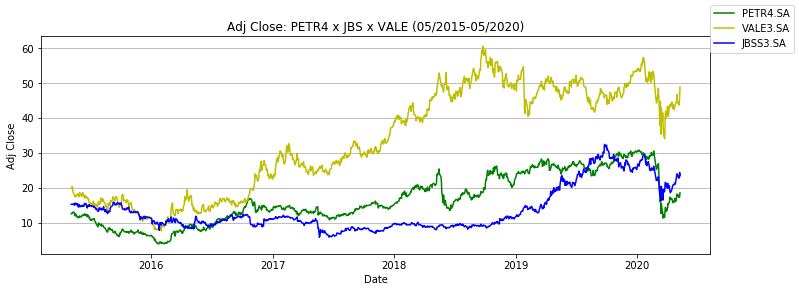

In [15]:
close, ax = plt.subplots(figsize=(12,4))

ax.plot(idx1,dadospetrobras,'g',label='PETR4.SA')
ax.plot(idx2,dadosvale,'y',label='VALE3.SA')
ax.plot(idx3,dadosjbs,'b',label='JBSS3.SA')

ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_title('Adj Close: PETR4 x JBS x VALE (05/2015-05/2020)')

ax.yaxis.grid(True)

close.legend()
plt.show()

In [16]:
petrobras['Total Traded'] = petrobras['Adj Close'] * petrobras['Volume']
jbs['Total Traded'] = jbs['Adj Close'] * jbs['Volume']
vale['Total Traded']= vale['Adj Close'] * vale['Volume']

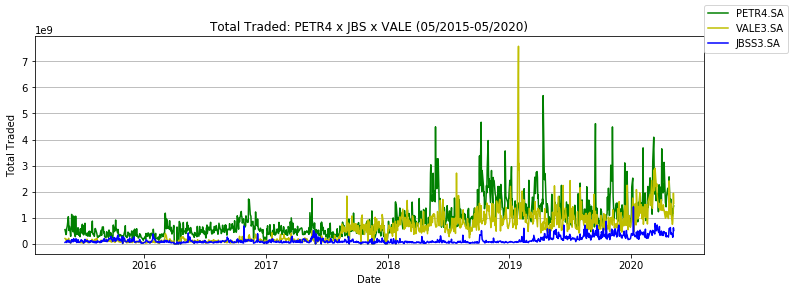

In [17]:
totaltraded, ax2 = plt.subplots(figsize=(12,4))

ax2.plot(idx1,petrobras['Total Traded'],'g',label='PETR4.SA')
ax2.plot(idx2,vale['Total Traded'],'y',label='VALE3.SA')
ax2.plot(idx3,jbs['Total Traded'],'b',label='JBSS3.SA')

ax2.set_xlabel('Date')
ax2.set_ylabel('Total Traded')
ax2.set_title('Total Traded: PETR4 x JBS x VALE (05/2015-05/2020)')
ax2.yaxis.grid(True)

totaltraded.legend()
plt.show()

In [18]:
petrobras['MA50'] = petrobras['Adj Close'].rolling(50).mean()
petrobras['MA200'] = petrobras['Adj Close'].rolling(200).mean()
vale['MA50'] = vale['Adj Close'].rolling(50).mean()
vale['MA200'] = vale['Adj Close'].rolling(200).mean()
jbs['MA50'] = jbs['Adj Close'].rolling(50).mean()
jbs['MA200'] = jbs['Adj Close'].rolling(200).mean()

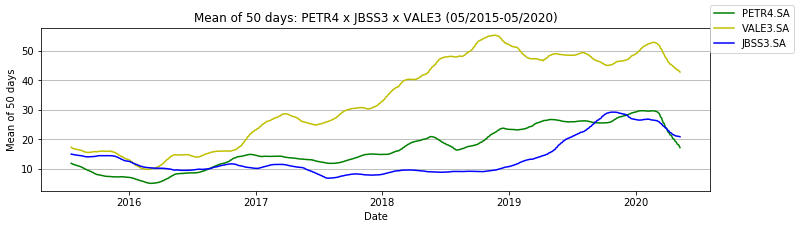

In [19]:
mean50, ax3 = plt.subplots(figsize=(12,3))

ax3.plot(idx1,petrobras['MA50'],'g',label='PETR4.SA')
ax3.plot(idx2,vale['MA50'],'y',label='VALE3.SA')
ax3.plot(idx3,jbs['MA50'],'b',label='JBSS3.SA')

ax3.set_xlabel('Date')
ax3.set_ylabel('Mean of 50 days')
ax3.set_title('Mean of 50 days: PETR4 x JBSS3 x VALE3 (05/2015-05/2020)')
ax3.yaxis.grid(True)

mean50.legend()
plt.show()


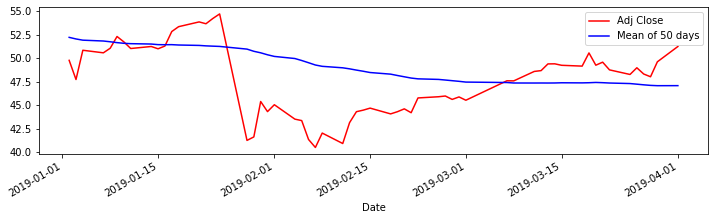

In [20]:
vale.loc['01-01-2019':'04-01-2019']['Adj Close'].plot(color = 'red',figsize=(12,3),label='Adj Close')
vale.loc['01-01-2019':'04-01-2019']['MA50'].plot(color = 'blue',label='Mean of 50 days')
plt.legend()
plt.show()


In [21]:
from pandas.plotting import scatter_matrix

In [22]:
relation = pd.concat([petrobras['Adj Close'],vale['Adj Close'],jbs['Adj Close']],axis=1)
relation.columns= ['PETR4.SA','VALE3.SA','JBSS3.SA']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E61AAC0988>,
      dtype=object)

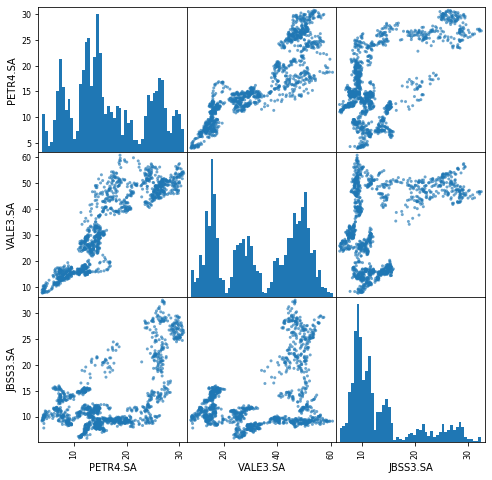

In [23]:
scatter_matrix(relation,figsize=(8,8),alpha=0.65,hist_kwds={'bins':50})

In [24]:
petrobras['Returns'] = (petrobras['Adj Close']/petrobras['Adj Close'].shift(1)) - 1
vale['Returns'] = (vale['Adj Close']/vale['Adj Close'].shift(1)) - 1
jbs['Returns'] = (jbs['Adj Close']/jbs['Adj Close'].shift(1))-1

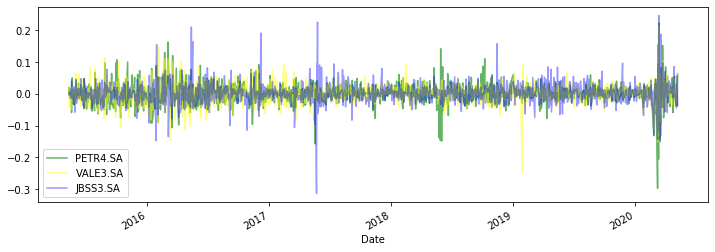

In [25]:
petrobras['Returns'].plot(color='green',figsize=(12,4),label='PETR4.SA',alpha=0.6)
vale['Returns'].plot(color='yellow',label='VALE3.SA',alpha=0.5)
jbs['Returns'].plot(color='blue',label='JBSS3.SA',alpha=0.4)
plt.legend()
plt.show()

In [28]:
petrobras['30-day-STD']= petrobras['Returns'].rolling(30).std()
vale['30-day-STD']= vale['Returns'].rolling(30).std()
jbs['30-day-STD'] = jbs['Returns'].rolling(30).std()

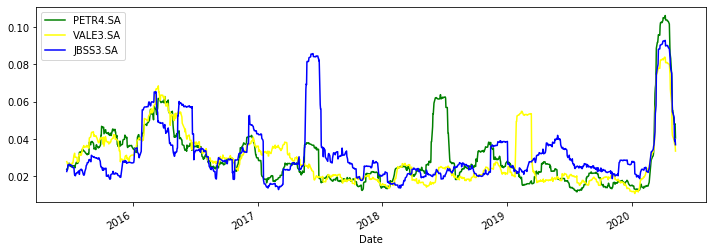

In [29]:
petrobras['30-day-STD'].plot(color='green',figsize=(12,4),label='PETR4.SA')
vale['30-day-STD'].plot(color='yellow',label='VALE3.SA')
jbs['30-day-STD'].plot(color='blue',label='JBSS3.SA')
plt.legend()
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

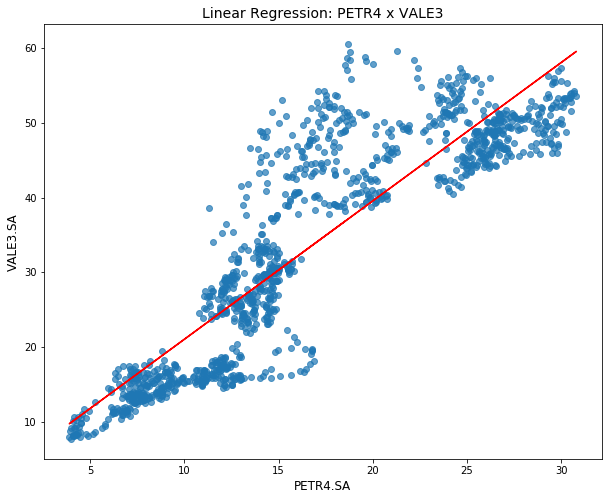

In [33]:
repetr4 = petrobras['Adj Close'].values.reshape(-1, 1)
revale3 = vale['Adj Close'].values.reshape(-1,1)
linear_regressor1 = LinearRegression()
linear_regressor1.fit(repetr4, revale3)
vale_pred = linear_regressor1.predict(repetr4)

regpv, ax4 = plt.subplots(figsize=(10,8))

ax4.set_xlabel('PETR4.SA',size=12)
ax4.set_ylabel('VALE3.SA',size=12)
ax4.set_title('Linear Regression: PETR4 x VALE3',size=14)

plt.scatter(repetr4, revale3,alpha=0.7)
plt.plot(repetr4, vale_pred, color='red')


plt.show()

In [34]:
from scipy.stats import pearsonr

In [35]:
correlation1, _= pearsonr(petrobras['Adj Close'], vale['Adj Close'])
print('The correlation between the price of PETR4 and VALE3 is:',(correlation1*100),'%')

The correlation between the price of PETR4 and VALE3 is: 88.82234382977458 %


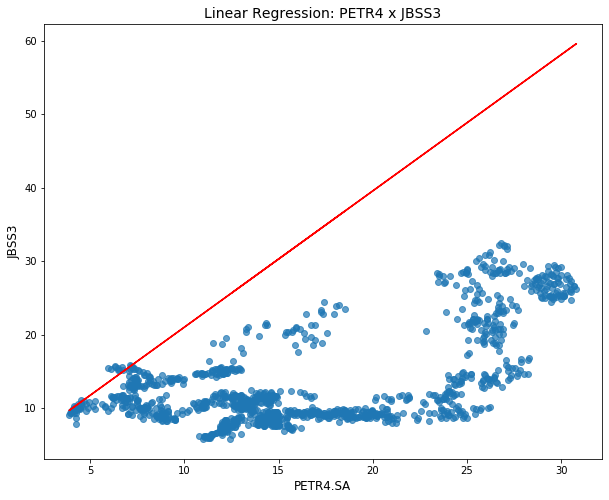

In [36]:
rejbs = jbs['Adj Close'].values.reshape(-1,1)
linear_regressor2 = LinearRegression()
linear_regressor2.fit(repetr4, rejbs)
jbs_pred = linear_regressor1.predict(repetr4)

regpj, ax5 = plt.subplots(figsize=(10,8))

ax5.set_xlabel('PETR4.SA',size=12)
ax5.set_ylabel('JBSS3',size=12)
ax5.set_title('Linear Regression: PETR4 x JBSS3',size=14)

plt.scatter(repetr4, rejbs,alpha=0.7)
plt.plot(repetr4,jbs_pred, color='red')


plt.show()

In [37]:
correlation2, _= pearsonr(petrobras['Adj Close'], jbs['Adj Close'])
print('The correlation between the price of PETR4 and JBSS3 is:',(correlation2*100),'%')

The correlation between the price of PETR4 and JBSS3 is: 62.44027655111378 %


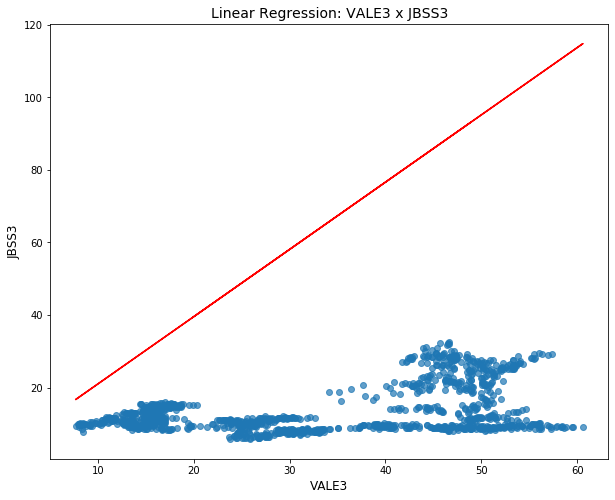

In [38]:
linear_regressor3 = LinearRegression()
linear_regressor3.fit(revale3, rejbs)
jbs_pred1 = linear_regressor1.predict(revale3)

regvj, ax6 = plt.subplots(figsize=(10,8))

ax6.set_xlabel('VALE3',size=12)
ax6.set_ylabel('JBSS3',size=12)
ax6.set_title('Linear Regression: VALE3 x JBSS3',size=14)

plt.scatter(revale3, rejbs,alpha=0.7)
plt.plot(revale3,jbs_pred1, color='red')


plt.show()

In [43]:
correlation3, _ = pearsonr(vale['Adj Close'],jbs['Adj Close'])
print('The correlation between VALE3 and JBSS3 is:', (correlation3*100),'%')

The correlation between VALE3 and JBSS3 is: 40.81836070111895 %
